In [253]:
import matplotlib
#import matplotlib.pyplot as plt
import os
import json
from pathlib import Path
from enum import Enum
import scipy.constants as sc
from scipy.signal import savgol_filter
#from tensorboard.backend.event_processing.event_file_loader import EventFileLoader

plt = matplotlib.pyplot

In [254]:
class Tag(Enum):
    #CUMULATIVE_REWARD = "Environment/Cumulative Reward"
    CUMULATIVE_REWARD = "cumulative_rewards"
    EP_LENGTH = "ep_length"
    DOOR_PASSAGE = "passage"

tag_colors = {
    Tag.CUMULATIVE_REWARD: "C1",
    Tag.EP_LENGTH: "C2"
    }

Select from what run to get data. Also choose the Type of data.

In [255]:
multiple_runs = True
selected_runs: list[int] = list(range(6445, 6454))
#selected_run = 1000
plot_step = 5
plot_all = True
selected_tag = Tag.DOOR_PASSAGE

In [256]:
def get_y_data(summary_dict: dict, id: int, tag: Tag):
    if tag in [Tag.CUMULATIVE_REWARD, Tag.EP_LENGTH]:
        return summary_dict[id]["env"][tag.value]
    if tag is Tag.DOOR_PASSAGE:
        return summary_dict[id]["door"][tag.value]

In [257]:
def get_x_data(summary_dict: dict, id: int, tag: Tag):
    d = len(get_y_data(summary_dict, id, tag))
    return summary_dict[id]["steps"][:d]

In [258]:
import pickle
summary_file_path = Path("C:/Users/max.muehlefeldt/Documents/GitHub/unity-machine-learning/python/basic_rl_env/summary_dict.pickle").absolute()

with open(summary_file_path, mode="rb") as file:
    summary_dict = pickle.load(file)

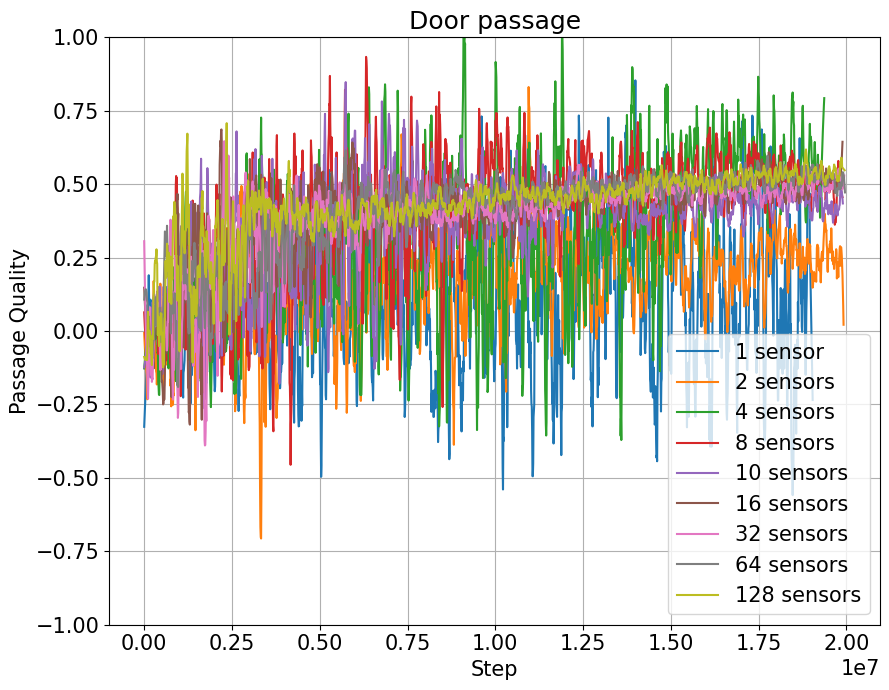

In [259]:
matplotlib.rcParams['font.size'] = 15

#if len(selected_runs) > 1:
if True:
    fig = plt.figure(figsize=(9, 7))
    #fig = plt.figure()
    fig.patch.set_alpha(0.)
    
    gs = fig.add_gridspec(ncols=1, nrows=1, figure=fig)

    # First plot.
    #selected_tag = Tag.EP_LENGTH
    axs_first = fig.add_subplot(gs[0, 0])
    #fig.suptitle(f"Runs {selected_runs[0]} - {selected_runs[-1]}", y=0.95)
    #fig.tight_layout()

    for id in selected_runs:
        #sensor_count = content[id]['stats']['sensorCount']
        sensor_count = summary_dict[id]["file_contents"]["unity_config"]["sensorCount"]
        #print(sensor_count)
        #run_label = f"{sensor_count} sensor" if sensor_count == 1 else f"{sensor_count} sensors, run {id}"
        run_label = f"{sensor_count} sensor" if sensor_count == 1 else f"{sensor_count} sensors"
        #run_label += f", no LSTM" if id == 6108 else ", with LSTM"

        #x = content[id]["x_values"][selected_tag]
        x = get_x_data(summary_dict, id, selected_tag)
        #y = savgol_filter( content[id]["y_values"][selected_tag], 15, 2)
        y = savgol_filter( get_y_data(summary_dict, id, selected_tag), 15, 2)
        #x = content[id]["x_values"][selected_tag]
        axs_first.plot(
            x, 
            y,
            #color=tag_colors[selected_tag]
            label=run_label
            )
    
    
    if selected_tag is Tag.CUMULATIVE_REWARD:
        axs_first.set_ylim(-2, 1.5)
        axs_first.axhline(1.25, label="Reward limit = 1.25", color="C3", linestyle="dashed")
        axs_first.set_ylabel("Reward")
        axs_first.set_title("Cumulative reward")

    elif selected_tag is Tag.EP_LENGTH:
        axs_first.set_ylim(0, 200)
        axs_first.set_ylabel("Length")
        axs_first.set_title("Episode length")
    
    elif selected_tag is Tag.DOOR_PASSAGE:
        axs_first.set_ylim(-1, 1)
        axs_first.set_ylabel("Passage Quality")
        axs_first.set_title("Door passage")
    
    axs_first.set_xlabel("Step")
    
    axs_first.legend()
    axs_first.grid()   

    #handles, labels = axs_first.get_legend_handles_labels()
    #order = [1, 2, 3, 4, 5, 0, 6]
    #axs_first.legend(
    #    [handles[i] for i in order],
    #    [labels[i] for i in order])
    
    # Second plot.
    #selected_tag = Tag.EP_LENGTH
    #axs_second = fig.add_subplot(gs[1, 0])
    #axs_second.plot(x_values[selected_tag], y_values[selected_tag], color=tag_colors[selected_tag])
    #axs_second.set_title(selected_tag.value.split("/")[-1])
    #axs_second.set_ylim(0, 200)
    #axs_second.set_xlabel("Step")
    #axs_second.set_ylabel("Actions")
    #axs_second.grid()
    #axs_second.legend()

    plt.subplots_adjust(hspace=0.4)
    plt.style.use("default")
    plt.tight_layout()
    #plt.savefig(f"{selected_run}_all.pdf")
    fig.savefig(f"{selected_runs[0]}-{selected_runs[-1]}_{selected_tag}.pdf")